In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import OneHotEncoder

# problem 1

In [5]:
fb = pd.read_csv('facebook_train.csv')
fb = fb.dropna()
fb

,total_followers,type,category,month,weekday,hour,paid,comment,like,share
0,124050,Photo,3,6,4,17,1,3,77,16
1,132556,Photo,2,8,3,24,0,11,313,50
2,92786,Photo,2,2,6,17,1,2,145,39
3,135632,Photo,1,9,2,1,0,2,299,49
4,139540,Link,1,12,3,17,1,7,229,21
...,...,...,...,...,...,...,...,...,...,...
392,138114,Status,2,12,2,1,0,12,498,87
393,127937,Status,2,6,3,18,0,4,85,20
394,135656,Video,1,9,6,24,0,7,397,143
395,124663,Photo,3,6,3,16,1,1,87,18


In [11]:
fb.type.unique()

array(['Photo', 'Link', 'Status', 'Video'], dtype=object)

In [24]:
enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(fb.type)
type_enc = enc.fit_transform(np.array(fb.type).reshape(-1,1)).toarray()
type_data = pd.DataFrame(type_enc, columns = ['Link', 'Photo', 'Status', 'Video'])
fb_dup = pd.concat([fb,type_data], axis = 1)
fb_dup

In [25]:
fb_dup = pd.concat([fb,type_data], axis = 1)
fb_dup

,total_followers,type,category,month,weekday,hour,paid,comment,like,share,Link,Photo,Status,Video
0,124050,Photo,3,6,4,17,1,3,77,16,0.0,1.0,0.0,0.0
1,132556,Photo,2,8,3,24,0,11,313,50,0.0,1.0,0.0,0.0
2,92786,Photo,2,2,6,17,1,2,145,39,0.0,1.0,0.0,0.0
3,135632,Photo,1,9,2,1,0,2,299,49,0.0,1.0,0.0,0.0
4,139540,Link,1,12,3,17,1,7,229,21,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,138114,Status,2,12,2,1,0,12,498,87,0.0,0.0,1.0,0.0
393,127937,Status,2,6,3,18,0,4,85,20,0.0,0.0,1.0,0.0
394,135656,Video,1,9,6,24,0,7,397,143,0.0,0.0,0.0,1.0
395,124663,Photo,3,6,3,16,1,1,87,18,0.0,1.0,0.0,0.0


In [ ]:
# Test actual test data

In [28]:
fb_test.type.unique()

array(['Photo', 'Status', 'Link'], dtype=object)

In [27]:
fb_test = pd.read_csv('facebook_test.csv')
fb_test = fb_test.dropna()
type_enc = enc.fit_transform(np.array(fb_test.type).reshape(-1,1)).toarray()
type_data = pd.DataFrame(type_enc, columns = ['Link', 'Photo', 'Status', 'Video'])
fb_test_dup = pd.concat([fb_test.dup,type_data], axis = 1)
fb_test_dup

ValueError: Shape of passed values is (99, 3), indices imply (99, 4)

In [13]:
fb_test.dropna()
fb_test.head(10)

,total_followers,type,category,month,weekday,hour,paid,comment,like,share,cvt_type
0,136568,Photo,1,10,4,1,0,0,8,0,1
1,137178,Photo,1,11,1,16,1,16,210,55,1
2,134414,Photo,2,10,1,15,0,15,384,67,1
3,124910,Photo,1,6,1,2,0,0,177,8,1
4,132112,Photo,2,8,2,15,0,3,44,12,1
5,122523,Photo,2,6,2,17,0,2,89,16,1
6,125054,Photo,1,6,1,1,0,6,69,6,1
7,122451,Photo,3,6,6,19,1,2,79,16,1
8,133255,Photo,2,8,4,24,1,3,132,20,1
9,124301,Photo,3,6,5,17,0,2,105,15,1


In [22]:
x_test_all = np.array(fb_test[['total_followers', 'cvt_type', 'category', 'month', 'weekday', 'paid']])
y_test_cmt = np.array(fb_test['comment']).reshape(-1,1)
y_test_like = np.array(fb_test['like']).reshape(-1,1)
y_test_share = np.array(fb_test['comment']).reshape(-1,1)


# predict comment

In [31]:
#get dependent and independent variables for the model
x = fb_dup.drop(['comment','like','share','type'], axis = 1)
y = np.array(fb_dup['comment']).reshape(-1,1)


In [36]:
#split data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 11 )
#specify model
cmt_reg = LinearRegression()
#train model
cmt_reg.fit(X_train, y_train)
#create predicted result for train data
pre_train = cmt_reg.predict(X_train)
#predicted results of test data
pre_test = cmt_reg.predict(X_test)
#compare std of output of 2 datasets
print('mean_squared_error is ', mean_squared_error(pre_test,y_test))
print('mean_absolute_error is ', mean_absolute_error(pre_test,y_test))
print('median_absolute_error is ',median_absolute_error(pre_test,y_test))

mean_squared_error is  161.9376529099521
mean_absolute_error is  9.19634518161862
median_absolute_error is  7.1932073414382565


In [37]:
import statsmodels.api as sm
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.5998
Date:                Mon, 14 Sep 2020   Prob (F-statistic):              0.797
Time:                        18:01:10   Log-Likelihood:                -1355.9
No. Observations:                 277   AIC:                             2732.
Df Residuals:                     267   BIC:                             2768.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
total_followers     0.0005      0.000      1.268      0.206      -0.000       0.001
category            0.0954      2.416      0.039      0.969      -4.661       4.852
month              -2.0032      1.810     -1.107      0.269      -5.568       1.561
weekday             0.9852      1.025      0.962      0.337      -1.032       3.002
hour               -0.0010      0.247     -0.004      0.997      -0.488       0.486
paid                6.7213      4.591      1.464      0.144      -2.319      15.761
Link              -40.5550     32.718     -1.240      0.216    -104.973      23.864
Photo             -37.4638     33.186     -1.129      0.260    -102.804      27.876
Status            -38.1383     34.012     -1.121      0.263    -105.105      28.828
Video             -36.9457     38.901     -0.950      0.343    -113.537      39.646
==============================================================================
Omnibus:                      470.236   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130743.070
Skew:                           9.162   Prob(JB):                         0.00
Kurtosis:                     107.844   Cond. No.                     4.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# predict likes

In [41]:
x = fb_dup.drop(['comment','like','share','type'], axis = 1)
y = np.array(fb_dup['like']).reshape(-1,1)

In [42]:
#split data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 11 )
#specify model
like_reg = LinearRegression()
#train model
like_reg.fit(X_train, y_train)
#create predicted result for train data
pre_train = like_reg.predict(X_train)
#predicted results of test data
pre_test = like_reg.predict(X_test)
#compare std of output of 2 datasets
print('mean_squared_error is ', mean_squared_error(pre_test,y_test))
print('mean_absolute_error is ', mean_absolute_error(pre_test,y_test))
print('median_absolute_error is ',median_absolute_error(pre_test,y_test))

mean_squared_error is  91986.68937663126
mean_absolute_error is  183.59338285742487
median_absolute_error is  119.73826374010386


In [43]:
import statsmodels.api as sm
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.050
Date:                Mon, 14 Sep 2020   Prob (F-statistic):              0.401
Time:                        18:02:24   Log-Likelihood:                -2081.1
No. Observations:                 277   AIC:                             4182.
Df Residuals:                     267   BIC:                             4218.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
total_followers     0.0036      0.005      0.723      0.470      -0.006       0.013
category           41.3703     33.125      1.249      0.213     -23.850     106.591
month              -8.6840     24.825     -0.350      0.727     -57.561      40.193
weekday            11.4632     14.049      0.816      0.415     -16.197      39.124
hour               -0.1795      3.392     -0.053      0.958      -6.858       6.499
paid              128.2101     62.959      2.036      0.043       4.251     252.169
Link             -353.2558    448.638     -0.787      0.432   -1236.575     530.063
Photo            -302.6578    455.055     -0.665      0.507   -1198.610     593.294
Status           -376.0274    466.385     -0.806      0.421   -1294.287     542.232
Video            -151.8261    533.416     -0.285      0.776   -1202.064     898.411
==============================================================================
Omnibus:                      450.276   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108693.025
Skew:                           8.441   Prob(JB):                         0.00
Kurtosis:                      98.564   Cond. No.                     4.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# predict shares

In [47]:
x = fb_dup.drop(['comment','like','share','type'], axis = 1)
y = np.array(fb_dup['share']).reshape(-1,1)

In [48]:
#split data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 11 )
#specify model
share_reg = LinearRegression()
#train model
share_reg.fit(X_train, y_train)
#create predicted result for train data
pre_train = share_reg.predict(X_train)
#predicted results of test data
pre_test = share_reg.predict(X_test)
#compare std of output of 2 datasets
print('mean_squared_error is ', mean_squared_error(pre_test,y_test))
print('mean_absolute_error is ', mean_absolute_error(pre_test,y_test))
print('median_absolute_error is ',median_absolute_error(pre_test,y_test))

mean_squared_error is  1255.5528421838671
mean_absolute_error is  25.790312628911412
median_absolute_error is  20.12730546060964


In [49]:
import statsmodels.api as sm
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.528
Date:                Mon, 14 Sep 2020   Prob (F-statistic):              0.138
Time:                        18:03:14   Log-Likelihood:                -1529.5
No. Observations:                 277   AIC:                             3079.
Df Residuals:                     267   BIC:                             3115.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
total_followers     0.0002      0.001      0.290      0.772      -0.001       0.002
category            7.6147      4.523      1.684      0.093      -1.290      16.519
month              -1.0343      3.389     -0.305      0.760      -7.707       5.639
weekday             2.5708      1.918      1.340      0.181      -1.206       6.347
hour                0.0881      0.463      0.190      0.849      -0.824       1.000
paid               16.5192      8.596      1.922      0.056      -0.405      33.443
Link              -21.9621     61.251     -0.359      0.720    -142.559      98.635
Photo             -13.6145     62.127     -0.219      0.827    -135.936     108.708
Status            -12.2714     63.674     -0.193      0.847    -137.639     113.096
Video              60.6256     72.826      0.832      0.406     -82.761     204.012
==============================================================================
Omnibus:                      521.691   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272382.688
Skew:                          11.048   Prob(JB):                         0.00
Kurtosis:                     155.025   Cond. No.                     4.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Problem 2

In [92]:
cas = pd.read_csv('casualty_train.csv')
cas.head(10)

,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year
0,passenger,female,33,False,NaN,NaN,motorbike,2007
1,passenger,female,20,False,NaN,NaN,car,2005
2,passenger,male,52,False,NaN,NaN,car,2006
3,passenger,female,17,False,NaN,NaN,pedestrian,2012
4,passenger,female,20,False,NaN,NaN,motorbike,2010
5,pedestrian,female,40,True,In road,In Rd Not Crossing,bicycle,2008
6,passenger,female,40,False,NaN,NaN,motorbike,2005
7,passenger,female,23,False,NaN,NaN,taxi,2007
8,driver,female,45,False,NaN,NaN,car,2006
9,pedestrian,male,8,False,Close to Crossing,Drivers N/Side,bicycle,2010


In [104]:
cas['age'].unique()

array(['33', '20', '52', '17', '40', '23', '45', '8', '7', 'Unknown',
       '43', '34', '32', '31', '29', '50', '4', '12', '25', '27', '38',
       '39', '51', '37', '86', '10', '46', '36', '28', '60', '57', '65',
       '21', '68', '3', '42', '18', '26', '24', '44', '61', '48', '5',
       '11', '35', '58', '13', '30', '56', '22', '84', '1', '15', '49',
       '63', '53', '41', '74', '73', '77', '19', '71', '75', '16', '47',
       '14', '64', '76', '2', '81', '79', '54', '67', '9', '83', '66',
       '87', '78', '80', '69', '59', '93', '70', '72', '88', '6', '85',
       '55', '82', '62', '89', '92', '0', '90', '98', '95', '91', '96',
       '97', '94', '99'], dtype=object)

In [108]:
for col in cas.columns:
    print('\t', col)
    print(cas[col].unique())
    print()

	 casualty_class
['passenger' 'pedestrian' 'driver']

	 gender
['female' 'male']

	 age
['33' '20' '52' '17' '40' '23' '45' '8' '7' 'Unknown' '43' '34' '32' '31'
 '29' '50' '4' '12' '25' '27' '38' '39' '51' '37' '86' '10' '46' '36' '28'
 '60' '57' '65' '21' '68' '3' '42' '18' '26' '24' '44' '61' '48' '5' '11'
 '35' '58' '13' '30' '56' '22' '84' '1' '15' '49' '63' '53' '41' '74' '73'
 '77' '19' '71' '75' '16' '47' '14' '64' '76' '2' '81' '79' '54' '67' '9'
 '83' '66' '87' '78' '80' '69' '59' '93' '70' '72' '88' '6' '85' '55' '82'
 '62' '89' '92' '0' '90' '98' '95' '91' '96' '97' '94' '99']

	 severe
[False  True]

	 pedestrian_location
[nan 'In road' 'Close to Crossing' 'Not on Crossing' 'Unknown'
 'Pedestrian Crossing' 'Footpath' 'Zig-Zag']

	 pedestrian_movement
[nan 'In Rd Not Crossing' 'Drivers N/Side' 'Unknown Or Other'
 'Drivers N/Side Msk' 'Drivers O/Side' 'Back To Traffic'
 'Drivers O/Side Msk' 'Facing Traffic' 'In Rd Not Crossing Msk']

	 travel
['motorbike' 'car' 'pedestrian' 

In [116]:
cas['age'][cas['age'] == 'Unknown']= '0'
cas['age'] = pd.to_numeric(cas['age'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
cate_var = ['casualty_class', 'gender', 'travel' ]
cvt_data = pd.DataFrame()
enc = OneHotEncoder(handle_unknown='ignore')

for var in cate_var: 
    cate_enc = enc.fit_transform(np.array(cas[var]).reshape(-1,1)).toarray()
    class_data = pd.DataFrame(cate_enc, columns = enc.categories_[0].tolist())
    cvt_data = pd.concat([cvt_data,class_data], axis = 1)
                          


In [124]:
cvt_data

,driver,passenger,pedestrian,female,male,bicycle,bus,car,motorbike,other,pedestrian,taxi
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
232830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
232831,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
232832,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
232833,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
cas['pedestrian_movement'][pd.isnull(cas['pedestrian_movement'])]= 'NaN'
cas['pedestrian_location'][pd.isnull(cas['pedestrian_location'])]= 'NaN'
cate_var = ['pedestrian_movement', 'pedestrian_location']
enc = OneHotEncoder(handle_unknown='ignore')

for var in cate_var: 
    cate_enc = enc.fit_transform(np.array(cas[var]).reshape(-1,1)).toarray()
    class_data = pd.DataFrame(cate_enc, columns = enc.categories_[0].tolist())
    cvt_data = pd.concat([cvt_data,class_data], axis = 1)

cvt_data.drop(['NaN'], axis = 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cas['severe'] = le.fit_transform(cas.severe)

In [133]:
cas = pd.concat([cas, cvt_data], axis = 1)
cas

,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year,driver,passenger,...,NaN,Unknown Or Other,Close to Crossing,Footpath,In road,NaN,Not on Crossing,Pedestrian Crossing,Unknown,Zig-Zag
0,passenger,female,33,False,NaN,NaN,motorbike,2007,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,passenger,female,20,False,NaN,NaN,car,2005,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,passenger,male,52,False,NaN,NaN,car,2006,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,passenger,female,17,False,NaN,NaN,pedestrian,2012,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,passenger,female,20,False,NaN,NaN,motorbike,2010,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232830,passenger,female,40,False,NaN,NaN,car,2014,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
232831,passenger,female,41,False,NaN,NaN,pedestrian,2013,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
232832,pedestrian,female,45,False,Close to Crossing,Drivers N/Side,bicycle,2010,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232833,pedestrian,male,10,True,Close to Crossing,Drivers N/Side Msk,bicycle,2009,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [141]:
X = cas.drop(['casualty_class', 'gender', 'travel', 'pedestrian_movement', 'pedestrian_location', 'severe' ], axis = 1)
Y = cas.severe
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 11)

In [164]:
len(cas.columns)

38

In [142]:
parameters = {'n_neighbors':[3,5,7,9]}
classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = classifier,
                             param_grid = parameters, 
                             scoring = 'accuracy', 
                             cv = 10)
# We learn the digits on the first half of the digits
grid_search = grid_search.fit(X_train, y_train)

grid_search.best_score_


0.8889768316049225

In [143]:
grid_search.best_params_

{'n_neighbors': 9}

In [146]:
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

Classification report for classifier KNeighborsClassifier(n_neighbors=9):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     62330
           1       0.28      0.02      0.04      7521

    accuracy                           0.89     69851
   macro avg       0.59      0.51      0.49     69851
weighted avg       0.83      0.89      0.84     69851




Text(0.5, 0.98, 'Confusion Matrix')

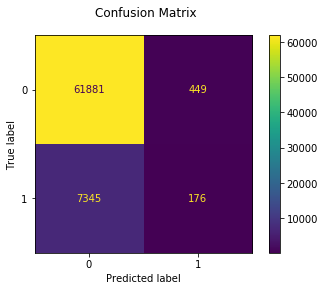

In [147]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

In [149]:
from sklearn.metrics import roc_auc_score

In [159]:
y_prob = classifier.predict_proba(X_test)[:,0]



In [161]:

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.400875 (macro),
0.400875 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.400875 (macro),
0.400875 (weighted by prevalence)
